# In this notebook we visualize effects of inserting promoters

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns

# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
def load_data(h5_dirs, scd_stats):
    dfs = []
    for h5_file in glob.glob(h5_dirs):
        dfs.append(
            akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None)
        )
    dfs = pd.concat(dfs)

    for stat in scd_stats:
        # for model in models:
        dfs[f"mean_{stat}_score"] = (
            dfs[f"{stat}_h1_m1_t0"]
            + dfs[f"{stat}_h1_m1_t1"]
            + dfs[f"{stat}_h1_m1_t2"]
            + dfs[f"{stat}_h1_m1_t3"]
            + dfs[f"{stat}_h1_m1_t4"]
            + dfs[f"{stat}_h1_m1_t5"]
        ) / 6

    return dfs.reset_index(drop=True)

In [3]:
zero_motif_enhancers_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/zero_motif_enhancers/*/*.h5"  #
)
zero_motif_enhancer_ctcf_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/zero_motif_enhancer_ctcf/*/*.h5"  #
)
zero_motif_enhancer_ctcf_boundary_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/zero_motif_enhancer_ctcf_boundary/*/*.h5"  #
)
zero_motif_promoters_5000_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/zero_motif_promoters_5000/*/*.h5"  #
)
zero_motif_promoters_10000_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/zero_motif_promoters_10000/*/*.h5"  #
)
zero_motif_promoters_20000_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/zero_motif_promoters_20000/*/*.h5"  #
)
zero_motif_promoters_2000_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/zero_motif_promoters_2000/*/*.h5"  #
)
zero_motif_promoters_1000_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/zero_motif_promoters_1000/*/*.h5"  #
)
zero_motif_promoters_1500_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/zero_motif_promoters_1500/*/*.h5"  #
)


promoter_enhancer_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/promoter_enhancer_zero_motifs/*/*.h5"
)
ctcfs_alone_h5_dirs = "/scratch1/kamulege/insert_experiments/ctcfs_alone_v2/*/*.h5"
boundary_enhancer_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/boundary_enhancer/*/*.h5"
)
boundary_promoter_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/zero_motif_promoter_ctcf_boundary/*/*.h5"
)
# boundary_promoter_enhancer_h5_dirs = "/scratch1/kamulege/insert_experiments/boundary_promoter_enhancer/*/*.h5"
scd_stats = ["SCD"]

single_ctcf_middle_h5_dirs = (
    "/scratch1/kamulege/insert_experiments/single_ctcf_test/*/*.h5"
)
two_ctcfs_h5_dirs = "/scratch1/kamulege/insert_experiments/two_ctcfs_test/*/*.h5"


zero_motif_enhancers_df = load_data(zero_motif_enhancers_h5_dirs, scd_stats)
zero_motif_enhancer_ctcf_df = load_data(zero_motif_enhancer_ctcf_h5_dirs, scd_stats)
zero_motif_enhancer_ctcf_boundary_df = load_data(
    zero_motif_enhancer_ctcf_boundary_h5_dirs, scd_stats
)

zero_motif_promoters_5000_df = load_data(zero_motif_promoters_5000_h5_dirs, scd_stats)
zero_motif_promoters_10000_df = load_data(zero_motif_promoters_10000_h5_dirs, scd_stats)
zero_motif_promoters_20000_df = load_data(zero_motif_promoters_20000_h5_dirs, scd_stats)
zero_motif_promoters_1000_df = load_data(zero_motif_promoters_1000_h5_dirs, scd_stats)
zero_motif_promoters_1500_df = load_data(zero_motif_promoters_1500_h5_dirs, scd_stats)
zero_motif_promoters_2000_df = load_data(zero_motif_promoters_2000_h5_dirs, scd_stats)

promoter_enhancer_df = load_data(promoter_enhancer_h5_dirs, scd_stats)
ctcfs_alone_df = load_data(ctcfs_alone_h5_dirs, scd_stats)
boundary_enhancer_df = load_data(boundary_enhancer_h5_dirs, scd_stats)
boundary_promoter_df = load_data(boundary_promoter_h5_dirs, scd_stats)
# boundary_promoter_enhancer_df = load_data(boundary_promoter_enhancer_h5_dirs, scd_stats)


single_ctcf_middle_df = load_data(single_ctcf_middle_h5_dirs, scd_stats)
two_ctcfs_h5_df = load_data(two_ctcfs_h5_dirs, scd_stats)

boundary_promoter_df

,CTCF_1_genomic_SCD,CTCF_1_insert,CTCF_2_genomic_SCD,CTCF_2_insert,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,...,promoter_avg_counts,promoter_avg_vst_counts,promoter_baseMean,promoter_gene_id,promoter_insert,promoter_log2FoldChange,promoter_num_of_ctcf_motifs,promoter_padj,promoter_tss,mean_SCD_score
0,53.53,"chr12,35192359,35192378,-$0$0$>",53.53,"chr12,35192359,35192378,-$0$120$>",46.31250,57.21875,53.53125,48.18750,53.31250,41.62500,...,4030.333333,12.092018,NaN,ENSMUSG00000033845.13,"chr1,4785711,4805711,-$0$1120$>",NaN,0,NaN,4785711,50.00000
1,53.53,"chr12,35192359,35192378,-$0$0$>",53.53,"chr12,35192359,35192378,-$0$120$>",46.78125,55.37500,48.87500,43.90625,49.75000,39.21875,...,177.833333,8.129007,238.442948,ENSMUSG00000026335.16,"chr1,97840812,97860812,-$0$1120$>",0.813278,0,0.000077,97840812,47.28125
2,53.53,"chr12,35192359,35192378,-$0$0$>",53.53,"chr12,35192359,35192378,-$0$120$>",44.84375,53.00000,47.37500,42.65625,47.68750,37.71875,...,6.000000,6.148489,NaN,ENSMUSG00000083860.2,"chr2,15107599,15127599,+$0$1120$>",NaN,0,NaN,15127599,45.53125
3,53.53,"chr12,35192359,35192378,-$0$0$>",53.53,"chr12,35192359,35192378,-$0$120$>",44.46875,53.18750,48.65625,43.75000,48.50000,38.28125,...,5.666667,6.159005,NaN,ENSMUSG00000081642.1,"chr2,57629229,57649229,-$0$1120$>",NaN,0,NaN,57629229,46.12500
4,53.53,"chr12,35192359,35192378,-$0$0$>",53.53,"chr12,35192359,35192378,-$0$120$>",47.00000,57.68750,53.43750,48.06250,53.31250,41.62500,...,82.333333,7.488757,NaN,ENSMUSG00000096006.1,"chr2,113920563,113940563,-$0$1120$>",NaN,0,NaN,113920563,50.15625
5,53.53,"chr12,35192359,35192378,-$0$0$>",53.53,"chr12,35192359,35192378,-$0$120$>",42.75000,55.21875,58.78125,53.40625,54.68750,42.59375,...,127.500000,7.777675,NaN,ENSMUSG00000025766.14,"chr3,41722610,41742610,+$0$1120$>",NaN,0,NaN,41742610,51.21875
6,53.53,"chr12,35192359,35192378,-$0$0$>",53.53,"chr12,35192359,35192378,-$0$120$>",46.62500,60.87500,61.81250,56.00000,59.40625,46.06250,...,746.666667,9.763795,NaN,ENSMUSG00000034544.17,"chr3,66961389,66981389,+$0$1120$>",NaN,0,NaN,66981389,55.12500
7,53.53,"chr12,35192359,35192378,-$0$0$>",53.53,"chr12,35192359,35192378,-$0$120$>",44.87500,52.65625,46.81250,42.12500,47.25000,37.53125,...,112.333333,7.555114,NaN,ENSMUSG00000027792.11,"chr3,73708416,73728416,-$0$1120$>",NaN,0,NaN,73708416,45.21875
8,53.53,"chr12,35192359,35192378,-$0$0$>",53.53,"chr12,35192359,35192378,-$0$120$>",45.71875,53.43750,46.81250,42.15625,47.71875,37.90625,...,16.333333,6.455174,NaN,ENSMUSG00000102420.1,"chr3,75024616,75044616,-$0$1120$>",NaN,0,NaN,75024616,45.62500
9,53.53,"chr12,35192359,35192378,-$0$0$>",53.53,"chr12,35192359,35192378,-$0$120$>",47.71875,59.00000,54.59375,49.21875,54.68750,42.59375,...,12.833333,6.379821,NaN,ENSMUSG00000051000.17,"chr3,85673989,85693989,-$0$1120$>",NaN,0,NaN,85673989,51.28125


In [4]:
boundary_promoter_df.columns

Index(['CTCF_1_genomic_SCD', 'CTCF_1_insert', 'CTCF_2_genomic_SCD',
       'CTCF_2_insert', 'SCD_h1_m1_t0', 'SCD_h1_m1_t1', 'SCD_h1_m1_t2',
       'SCD_h1_m1_t3', 'SCD_h1_m1_t4', 'SCD_h1_m1_t5', 'background_seqs',
       'promoter_DE_status', 'promoter_Geneid', 'promoter_H3K27Ac_score_0',
       'promoter_NIPBL_score_0', 'promoter_SYMBOL', 'promoter_Unnamed: 0',
       'promoter_avg_counts', 'promoter_avg_vst_counts', 'promoter_baseMean',
       'promoter_gene_id', 'promoter_insert', 'promoter_log2FoldChange',
       'promoter_num_of_ctcf_motifs', 'promoter_padj', 'promoter_tss',
       'mean_SCD_score'],
      dtype='object')

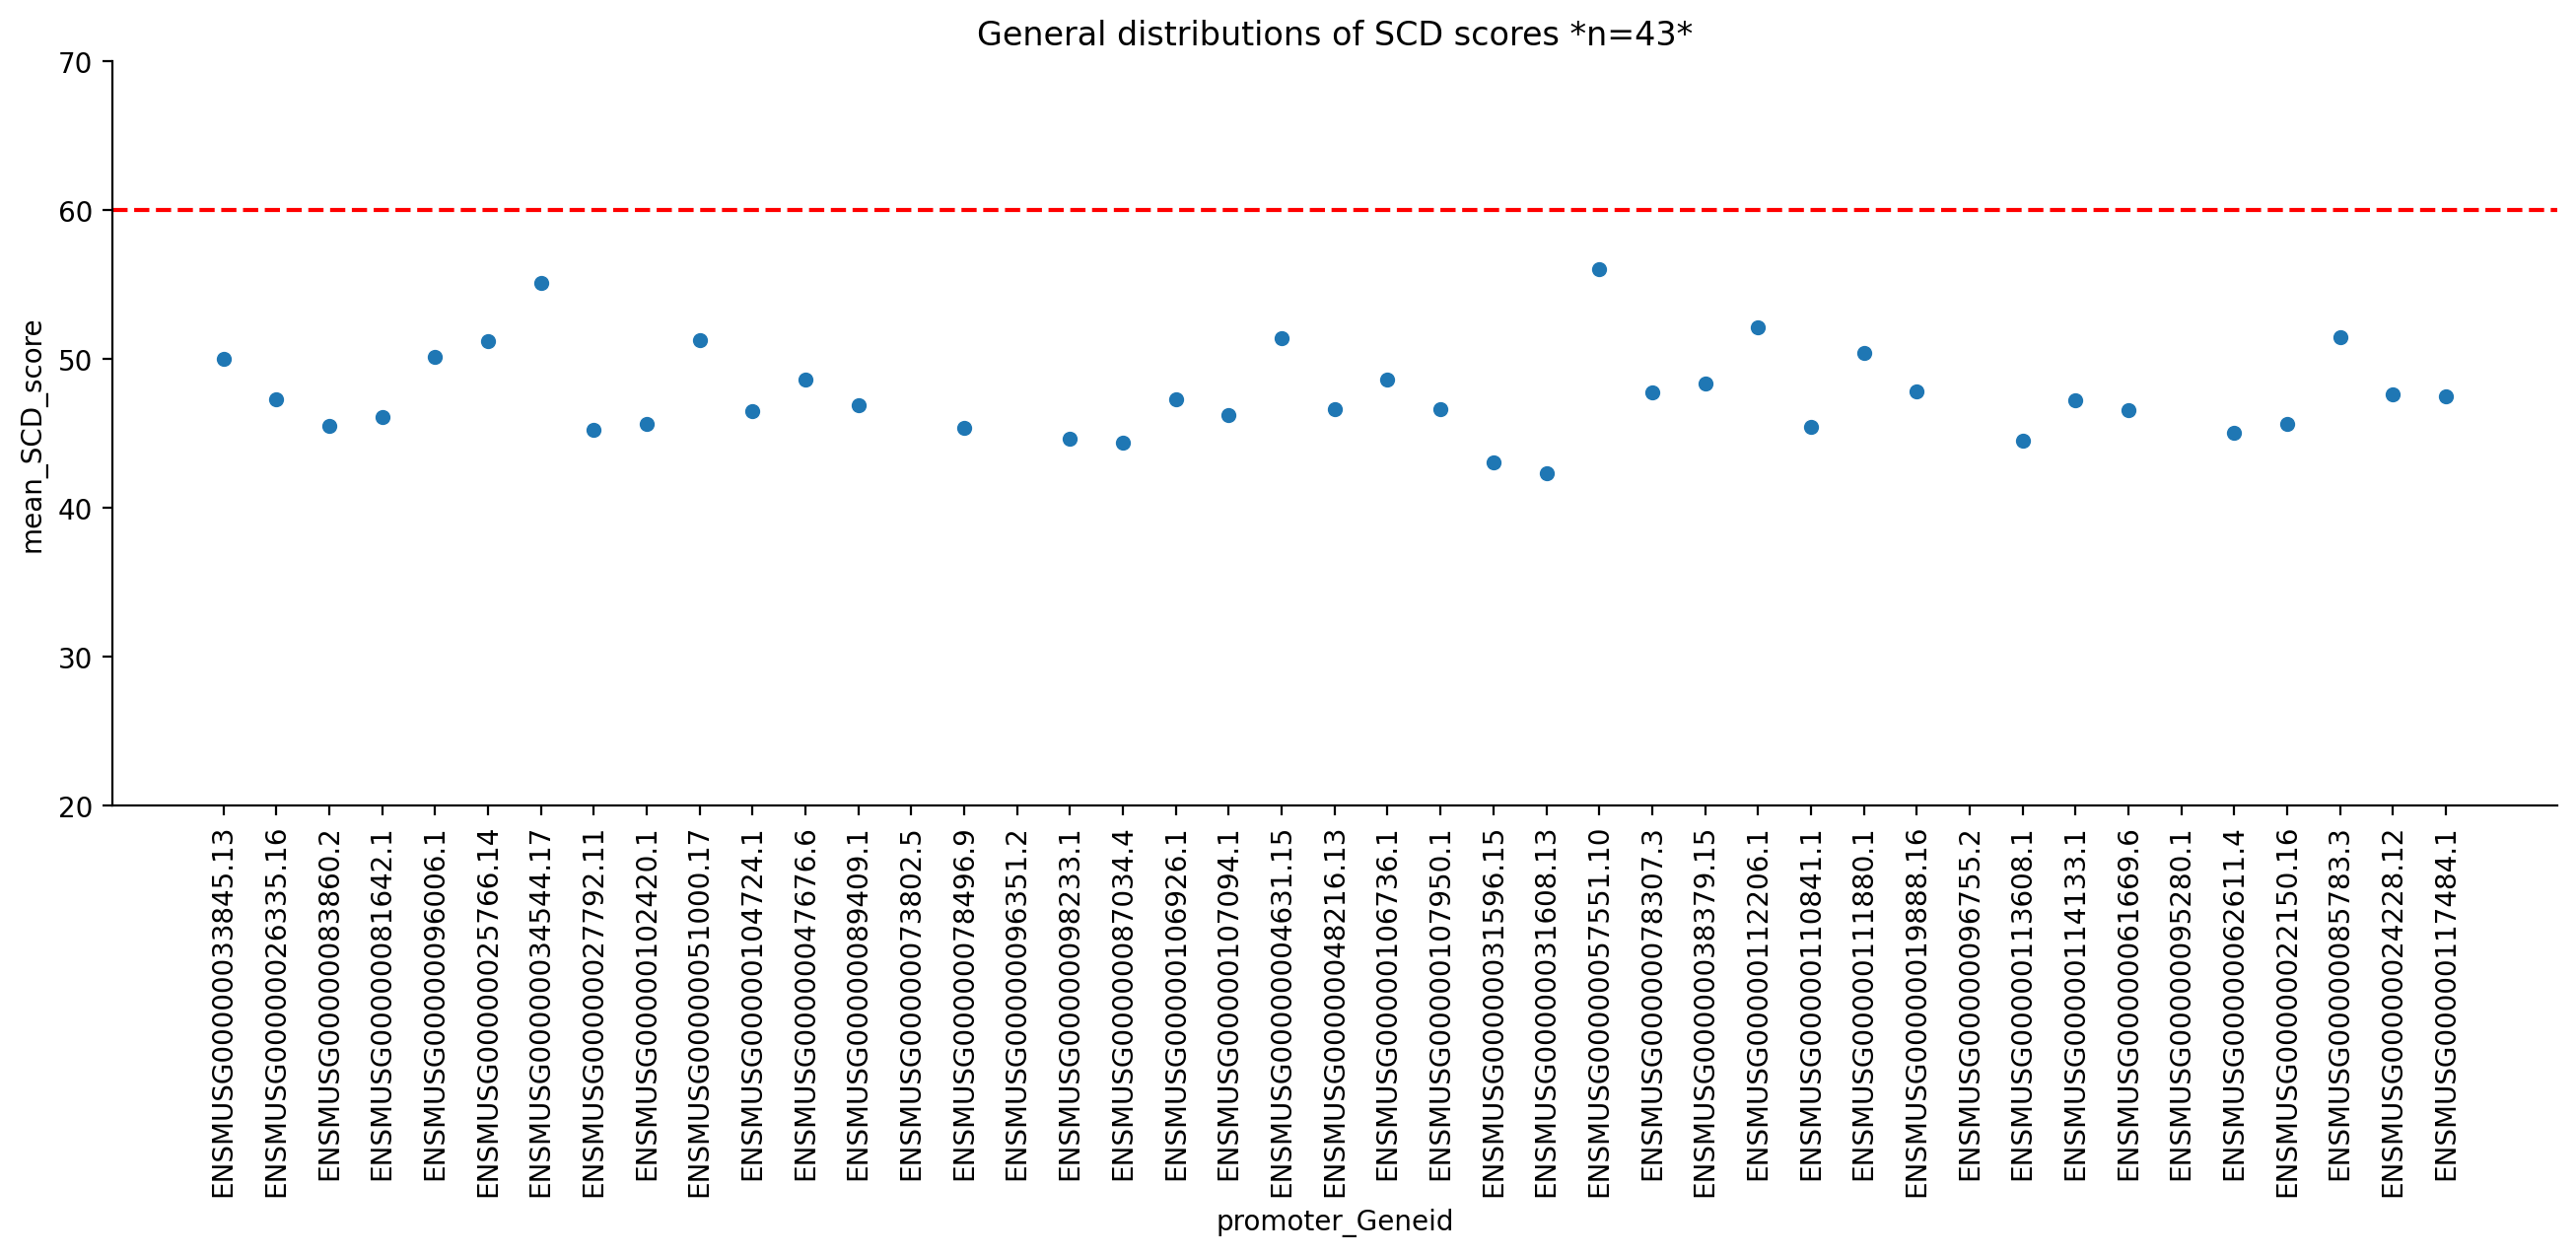

In [9]:
# fig, ax = plt.subplots(figsize=(16, 5),dpi=200)
# dataframe = zero_motif_enhancers_df
# sns.scatterplot(
#     data=dataframe, y="mean_SCD_score", x='enhancer_Unnamed: 0',
# )
# sns.despine(top = True, right = True)
# ax.axhline(y=60, color='r', linestyle='--')
# ax.set_ylim(20,70)
# plt.title(f"General distributions of SCD scores *n={dataframe.shape[0]}*")
# plt.xticks(rotation=90)
# plt.show()


fig, ax = plt.subplots(figsize=(16, 5), dpi=200)
dataframe = boundary_promoter_df
sns.scatterplot(
    data=dataframe,
    y="mean_SCD_score",
    x="promoter_Geneid",
)
sns.despine(top=True, right=True)
ax.axhline(y=60, color="r", linestyle="--")
ax.set_ylim(20, 70)
plt.title(f"General distributions of SCD scores *n={dataframe.shape[0]}*")
plt.xticks(rotation=90)
plt.show()


# fig, ax = plt.subplots(figsize=(16, 5),dpi=200)
# dataframe = zero_motif_enhancer_ctcf_boundary_df
# sns.scatterplot(
#     data=dataframe, y="mean_SCD_score", x='enhancer_Unnamed: 0',
# )
# sns.despine(top = True, right = True)
# ax.axhline(y=60, color='r', linestyle='--')
# ax.set_ylim(20,70)
# plt.title(f"General distributions of SCD scores *n={dataframe.shape[0]}*")
# plt.xticks(rotation=90)
# plt.show()


#
# for dataframe in [zero_motif_promoters_20000_df]: #[zero_motif_promoters_1000_df, zero_motif_promoters_1500_df, zero_motif_promoters_2000_df, zero_motif_promoters_5000_df, zero_motif_promoters_10000_df, zero_motif_promoters_20000_df]:
#     x_var = [col for col in dataframe.columns if 'Geneid' in col][0]

#     fig, ax = plt.subplots(figsize=(16, 5),dpi=200)
#     sns.scatterplot(
#         data=dataframe, y="mean_SCD_score", x=x_var, ax=ax
#     )
#     ax.set_title(f"General distributions of SCD scores *n={dataframe.shape[0]}*")
#     sns.despine(top = True, right = True)
#     ax.axhline(y=60, color='r', linestyle='--')
#     ax.set_ylim(20,70)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#     plt.show()


# data=promoter_enhancer_df
# data=data.loc[True==(data["promoter_num_of_motifs"]==0)]
# data=data.loc[True==(data["enhancer_num_of_motifs"]==0)]
# # data= data.loc[True==(data["mean_SCD_score"]>=40)]
# sns.boxplot(data=data, y="mean_SCD_score", x="gene_symbol") # , hue="gene_offset"
# plt.title(f"General distributions of SCD scores *n={data.shape[0]}*")
# plt.xticks(rotation=90)
# plt.show()


# data = two_ctcfs_h5_df
# data = data.loc[True == (data["0_genomic_SCD"] >= 20)]
# sns.scatterplot(data=data, y="mean_SCD_score", x="1_genomic_SCD")
# plt.title(f"General distributions of SCD scores *n={data.shape[0]}*")
# plt.xticks(rotation=90)
# plt.show()


# plt.figure(figsize=(16, 5),dpi=200)
# data = single_ctcf_middle_df
# # data = data.loc[True == (data["0_genomic_SCD"] >= 50)]
# sns.scatterplot(data=data, y="mean_SCD_score", x="0_genomic_SCD")
# plt.title(f"General distributions of SCD scores *n={data.shape[0]}*")
# sns.despine(top = True, right = True)
# plt.axhline(y=60, color='r', linestyle='--')
# # plt.ylim(20,70)
# plt.xticks(rotation=90)
# plt.show()

NameError: name 'enhancers_alone_df' is not defined

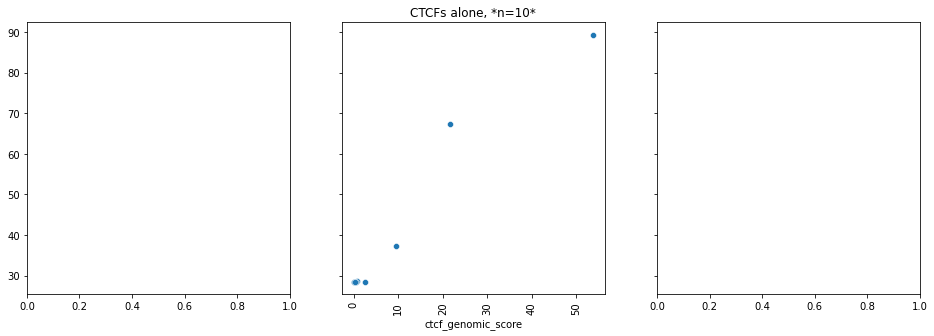

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

# Boxplot of mean_SCD_score for each value of ctcf_genomic_score_2 in ctcfs_alone_df
data = ctcfs_alone_df
# data = ctcfs_alone_df.loc[True==(ctcfs_alone_df["ctcf_genomic_score_1"]<=20)]
data = ctcfs_alone_df.loc[
    True
    == (
        ctcfs_alone_df["ctcf_genomic_score_1"] == ctcfs_alone_df["ctcf_genomic_score_2"]
    )
]
sns.scatterplot(data=data, y="mean_SCD_score", x="ctcf_genomic_score_2", ax=ax2)
ax2.set_title(f"CTCFs alone, *n={data.shape[0]}*")
ax2.set_xlabel("ctcf_genomic_score")
ax2.set_ylabel("mean_SCD_score")
ax2.tick_params(axis="x", rotation=90)

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_alone_df
data = enhancers_alone_df.loc[
    True == (enhancers_alone_df["enhancer_num_of_motifs"] == 0)
]
# data = boundary_enhancer_df.loc[True==(boundary_enhancer_df["enhancer_num_of_motifs"]==0)]
sns.scatterplot(
    data=data, y="mean_SCD_score", x="enhancer_symbol", ax=ax1
)  #  hue="enhancer_offset",
ax1.set_title(f"Enhancers alone, *n={data.shape[0]}*")
ax1.set_xlabel("enhancer_symbol")
ax1.set_ylabel("mean_SCD_score")
ax1.tick_params(axis="x", rotation=90)

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_alone_df
data = boundary_enhancer_df.loc[
    True == (boundary_enhancer_df["enhancer_num_of_motifs"] == 0)
]
data = boundary_enhancer_df.loc[
    True
    == (
        boundary_enhancer_df["ctcf_genomic_score_1"]
        == boundary_enhancer_df["ctcf_genomic_score_2"]
    )
]
sns.scatterplot(
    data=data, y="mean_SCD_score", x="ctcf_genomic_score_2", ax=ax3
)  #  hue="enhancer_offset",
ax3.set_title(f"Enhancer_ctcf, *n={data.shape[0]}*")
ax3.set_xlabel("ctcf_genomic_score")
ax3.set_ylabel("")
ax3.tick_params(axis="x", rotation=90)

# Display the figure
plt.show()

# Create a figure with two subplots
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

# # Boxplot of mean_SCD_score for each value of ctcf_genomic_score_2 in ctcfs_alone_df
# data = ctcfs_alone_df
# data = ctcfs_alone_df.loc[True==(ctcfs_alone_df["ctcf_genomic_score_1"]>=20)]
# sns.scatterplot(data=data, y="mean_SCD_score", x="ctcf_genomic_score_2", ax=ax2)
# ax2.set_title(f"CTCFs alone, *n={data.shape[0]}*")
# ax2.set_xlabel("ctcf_genomic_score_2")
# ax2.set_ylabel("mean_SCD_score")
# ax2.tick_params(axis='x', rotation=90)

# # Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_alone_df
# data = enhancers_alone_df.loc[True==(enhancers_alone_df["enhancer_num_of_motifs"]==0)]
# sns.scatterplot(data=data, y="mean_SCD_score", x="enhancer_symbol", ax=ax1) #  hue="enhancer_offset",
# ax1.set_title(f"Enhancers alone, *n={data.shape[0]}*")
# ax1.set_xlabel("enhancer_symbol")
# ax1.set_ylabel("mean_SCD_score")
# ax1.tick_params(axis='x', rotation=90)

# # Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_ctcf_df
# data = boundary_enhancer_df.loc[True==(boundary_enhancer_df["enhancer_num_of_motifs"]==0)]
# data = boundary_enhancer_df.loc[True==(boundary_enhancer_df["ctcf_genomic_score_1"]>=20)]
# sns.scatterplot(data=data, y="mean_SCD_score", x="ctcf_genomic_score_2", ax=ax3) #  hue="enhancer_offset",
# ax3.set_title(f"Enhancer_ctcf, *n={data.shape[0]}*")
# ax3.set_xlabel("ctcf_genomic_score_2")
# ax3.set_ylabel("mean_SCD_score")
# ax3.tick_params(axis='x', rotation=90)

# # Display the figure
# plt.show()

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(30, 5))  #

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_alone_df
data = enhancers_alone_df.loc[
    True == (enhancers_alone_df["enhancer_num_of_motifs"] == 0)
]
sns.scatterplot(
    data=data, y="mean_SCD_score", x="enhancer_symbol", ax=ax1
)  #  hue="enhancer_offset",
ax1.set_title(f"Enhancers alone, *n={data.shape[0]}*")
ax1.set_xlabel("enhancer_symbol")
ax1.set_ylabel("mean_SCD_score")
ax1.tick_params(axis="x", rotation=90)

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_alone_df
data = promoters_alone_df.loc[
    True == (promoters_alone_df["promoter_num_of_motifs"] == 0)
]
sns.scatterplot(
    data=data, y="mean_SCD_score", x="gene_symbol", ax=ax2
)  #  hue="enhancer_offset",
ax2.set_title(f"promoters alone, *n={data.shape[0]}*")
ax2.set_xlabel("gene_symbol")
ax2.set_ylabel("mean_SCD_score")
ax2.tick_params(axis="x", rotation=90)

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_ctcf_df
data = promoter_enhancer_df.loc[
    True == (promoter_enhancer_df["enhancer_num_of_motifs"] == 0)
]
data = data.loc[True == (data["promoter_num_of_motifs"] == 0)]

# data = data.loc[True==(data["gene_offset"]==-100000)]
# data = data.loc[True == ("ENSMUSG00000096351.2" == data["gene_symbol"])]
sns.scatterplot(
    data=data, y="mean_SCD_score", x="gene_symbol", hue="promoter_NIPBL_signal", ax=ax3
)  #
ax3.set_title(f"promoter_enhancer, *n={data.shape[0]}*")
# ax3.set_xlabel("gene_symbol")
# ax3.set_ylabel("mean_SCD_score")
ax3.tick_params(axis="x", rotation=90)

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_ctcf_df
data = boundary_promoter_df.loc[
    True == (boundary_promoter_df["promoter_num_of_motifs"] == 0)
]
data = data.loc[True == (data["promoter_num_of_motifs"] == 0)]
data = data.loc[True == (data["ctcf_genomic_score_2"] >= 20)]
data = data.loc[True == (data["ctcf_genomic_score_1"] >= 20)]
# data = data.loc[True==(data["gene_offset"]==-100000)]
# data = data.loc[True == ("ENSMUSG00000096351.2" == data["gene_symbol"])]
sns.scatterplot(
    data=data, y="mean_SCD_score", x="gene_symbol", hue="promoter_NIPBL_signal", ax=ax4
)  #
ax4.set_title(f"promoter_ctcf, *n={data.shape[0]}*")
# ax3.set_xlabel("gene_symbol")
# ax3.set_ylabel("mean_SCD_score")
ax4.tick_params(axis="x", rotation=90)


# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_ctcf_df
data = ctcfs_alone_df
data = data.loc[True == (data["ctcf_genomic_score_2"] >= 20)]
data = data.loc[True == (data["ctcf_genomic_score_1"] >= 20)]
sns.scatterplot(data=data, y="mean_SCD_score", x="ctcf_genomic_score_2", ax=ax5)  #
ax5.set_title(f"ctcfs, *n={data.shape[0]}*")
# ax3.set_xlabel("gene_symbol")
# ax3.set_ylabel("mean_SCD_score")
ax5.tick_params(axis="x", rotation=90)

# Display the figure
plt.show()